<a href="https://colab.research.google.com/github/cannel14/-Classification-Analysis-Supervised-Learning-/blob/main/Google_play_store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**B2C IPG Merchant Payment App
Competitor Analysis **

IPG Merchant payment app has many competitors but we're going to take a deep dive on the three main competitors,this include:
1. Kopokopo
2. PesaPal
3. Paystack



While trying to understand the overall market share of each competitor one of the identifiers/ distinguishers in terms of Market share is Product review from the end consumers of a particular product.In this case, we're going to conduct a sentimental analysis to get a feel of how the customer feels or bring emotions.

Sentiment analysis, also known as opinion mining, is the process of using natural language processing, text analysis, and computational linguistics to identify and extract subjective information from text. It is often used to determine the overall sentiment of a piece of text, such as whether a review of a product is positive or negative.

There are several ways to perform sentimental analysis in Python. One way is to use a pre-trained machine learning model to classify text as having positive, negative, or neutral sentiment.

The sentiment attribute of the TextBlob object returns a tuple containing the polarity and subjectivity of the text. The polarity is a value between -1 and 1, where -1 indicates a negative sentiment and 1 indicates a positive sentiment. The subjectivity is a value between 0 and 1, where 0 indicates a very objective piece of text and 1 indicates a very subjective piece of text.

In [85]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We can use libraries like NLTK, Gensim, TextBlob, spaCY, CoreNLP for data pre-processing and sentiment analysis. We will use NLTK for pre-processing of data and TextBlob to calculate sentiment score (sentiment polarity and subjectivity ) .

In [87]:
# import libraries
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import emoji
import re
import nltk

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize

**Kopo Kopo Reviews Sentimental Analysis**

In [88]:
#scrap all reviews
Kopo_kopo, continuation_token = reviews(
    'com.kopokopo.kopo',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

## Pesapal RSA

In [89]:
#scrap all reviews
Pesapal, continuation_token = reviews(
    'duka.pesapal.com',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

## **Paystack RSA**

In [90]:
#scrap all reviews
Pay_stack, continuation_token = reviews(
    'com.paystack.go',
    sort = Sort.MOST_RELEVANT,
    count = 900,
    filter_score_with = None
    
)

## **PesaPal data Import**

In [91]:
#converting into data Frame
PesaPal_data = pd.DataFrame(np.array(Pesapal), columns = ['review'])
PesaPal_data = PesaPal_data.join(pd.DataFrame(PesaPal_data.pop('review').tolist()))
PesaPal_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,2ece545e-bd8a-4750-ab29-b509cce6b677,kiirya ronald,https://play-lh.googleusercontent.com/a-/AD5-W...,"One of the best POs app, one improvement neede...",3,0,35.4,2022-06-22 06:50:54,None,None
1,f7c64b4c-1110-4550-9ce9-bb2b589fa9be,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's the best love it, saves time and it's acc...",5,7,29,2018-11-21 09:48:20,None,None
2,a28a93de-7198-4e9c-827b-f198f0992520,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The app is nice but anytime I try selling on c...,5,3,29,2019-12-09 18:59:03,None,None
3,0e8361a1-20a9-473f-b0ef-ba1c275e7224,serah mutemi,https://play-lh.googleusercontent.com/a-/AD5-W...,Its a good app I wish it were available on des...,4,6,32,2020-08-27 07:41:29,None,None
4,465370fa-dccf-4a15-9bd1-2f71fe898939,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,best app need charts summary thanks alot,5,3,29,2019-01-13 19:23:58,None,None


In [92]:
print(PesaPal_data.shape)
PesaPal_data.info()

(21, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21 non-null     object        
 1   userName              21 non-null     object        
 2   userImage             21 non-null     object        
 3   content               21 non-null     object        
 4   score                 21 non-null     int64         
 5   thumbsUpCount         21 non-null     int64         
 6   reviewCreatedVersion  17 non-null     object        
 7   at                    21 non-null     datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 1.8+ KB


In [93]:
len(PesaPal_data.index)

21

In [94]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
PesaPal_data1 = PesaPal_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
PesaPal_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,"One of the best POs app, one improvement neede...",35.4,3,2022-06-22 06:50:54,0
1,"It's the best love it, saves time and it's acc...",29,5,2018-11-21 09:48:20,7
2,The app is nice but anytime I try selling on c...,29,5,2019-12-09 18:59:03,3
3,Its a good app I wish it were available on des...,32,4,2020-08-27 07:41:29,6
4,best app need charts summary thanks alot,29,5,2019-01-13 19:23:58,3


In [95]:
PesaPalsort_data = PesaPal_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
PesaPalsort_data.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,"One of the best POs app, one improvement neede...",35.4,3,2022-06-22 06:50:54,0
19,Uduma nzuri inarahisisha,None,5,2021-12-28 10:23:57,0
6,Pesapal ina saìdia wakati wowote ile unapoiita...,29,4,2020-10-06 05:37:35,0
3,Its a good app I wish it were available on des...,32,4,2020-08-27 07:41:29,6
2,The app is nice but anytime I try selling on c...,29,5,2019-12-09 18:59:03,3


In [96]:
PesaPalsort_data.to_excel("PesaPal.xlsx", index = False) #download PesaPal excel file

## **PayStack data Import**

In [97]:
#converting into data Frame
Paystack_data = pd.DataFrame(np.array(Pay_stack), columns = ['review'])
Paystack_data = Paystack_data.join(pd.DataFrame(Paystack_data.pop('review').tolist()))
Paystack_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,edfc3d36-bb4d-4d5a-b747-889cfa726ad9,Edidiong Ibanga,https://play-lh.googleusercontent.com/a-/AD5-W...,Please this updated version is really giving m...,1,4,1.9.3,2022-11-11 14:19:40,None,NaT
1,899a557e-daad-4f9a-9b53-d023babb2fed,Miracle Enomfon (Godfather),https://play-lh.googleusercontent.com/a-/AD5-W...,After creating an account in the app I could n...,1,3,1.9.3,2022-11-19 11:32:25,None,NaT
2,3c5d3256-efed-41ec-b01a-5f328ad16610,ODU Enemona Daniel prime,https://play-lh.googleusercontent.com/a-/AD5-W...,"the updated version is not signing in, when i ...",1,2,1.9.3,2022-11-18 08:10:45,None,NaT
3,d554cb22-684d-45c7-ae0a-c9f0f83e222f,Chukwuemeka Precious Asadu,https://play-lh.googleusercontent.com/a-/AD5-W...,Awesome experience. I've been awaiting this fo...,4,67,1.1.4,2020-05-31 08:45:28,"Hi Chukuwemeka, thank you so much for the kind...",2020-06-16 18:23:29
4,ca2475d9-70f9-4f67-8c64-3c2f2c16fe77,ige james,https://play-lh.googleusercontent.com/a-/AD5-W...,The app is user friendly and easy to navigate ...,4,7,1.8.3,2022-10-17 08:02:33,None,NaT


In [98]:
print(Paystack_data.shape)
Paystack_data.info()

(278, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              278 non-null    object        
 1   userName              278 non-null    object        
 2   userImage             278 non-null    object        
 3   content               278 non-null    object        
 4   score                 278 non-null    int64         
 5   thumbsUpCount         278 non-null    int64         
 6   reviewCreatedVersion  220 non-null    object        
 7   at                    278 non-null    datetime64[ns]
 8   replyContent          138 non-null    object        
 9   repliedAt             138 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 21.8+ KB


In [99]:
len(Paystack_data.index)

278

In [100]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
Paystack_data1 = Paystack_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
Paystack_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,Please this updated version is really giving m...,1.9.3,1,2022-11-11 14:19:40,4
1,After creating an account in the app I could n...,1.9.3,1,2022-11-19 11:32:25,3
2,"the updated version is not signing in, when i ...",1.9.3,1,2022-11-18 08:10:45,2
3,Awesome experience. I've been awaiting this fo...,1.1.4,4,2020-05-31 08:45:28,67
4,The app is user friendly and easy to navigate ...,1.8.3,4,2022-10-17 08:02:33,7


In [101]:
Paystacksort_data = Paystack_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
Paystacksort_data.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
26,Kenya is missing on registration. I thought yo...,1.9.4,2,2022-12-21 20:58:35,0
125,Word conect game,1.9.4,5,2022-12-08 07:46:36,0
27,I give it 3 🌟 because it not working today,1.9.4,3,2022-12-01 00:54:55,1
56,Why can't I login in to my acct pls help me re...,1.9.3,3,2022-11-23 13:12:26,1
231,Nice and good,1.9.3,5,2022-11-21 23:22:07,1


In [102]:
Paystacksort_data.to_excel("Paystack.xlsx", index = False) #download Paystack excel file

## **Kopo Kopo data Import**

In [103]:
#converting into data Frame
Kopo_kopo_data = pd.DataFrame(np.array(Kopo_kopo), columns = ['review'])
Kopo_kopo_data = Kopo_kopo_data.join(pd.DataFrame(Kopo_kopo_data.pop('review').tolist()))
Kopo_kopo_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,a2795acb-8503-45f0-b7a4-d6528943445c,kinyua royford,https://play-lh.googleusercontent.com/a-/AD5-W...,Ultimate Solution for Business Payments. You c...,5,6,5.3.0,2022-10-06 08:00:04,None,NaT
1,04c8d42b-1658-422e-b081-82f1fdb38834,John Irungu,https://play-lh.googleusercontent.com/a-/AD5-W...,"Easy to use, multiple customer friendly featur...",5,80,5.3.0,2022-07-09 04:55:18,None,NaT
2,4dbe2409-c554-4a9e-a25a-79fac704f72a,Emmanuel Musyimi,https://play-lh.googleusercontent.com/a-/AD5-W...,Very slow app very very disappointing app I ca...,1,4,5.3.0,2022-11-04 16:59:12,None,NaT
3,0d8477c4-bd26-4803-ad88-3e2ccf9b2271,george wamathai,https://play-lh.googleusercontent.com/a-/AD5-W...,"Very useless app, how can I be transacting my ...",1,1,5.3.0,2022-11-25 09:19:42,None,NaT
4,06a3732e-95ef-4cea-b0a7-1a31e9cad9bc,Jay Ngareh,https://play-lh.googleusercontent.com/a-/AD5-W...,"This new app is not user friendly, to complica...",1,70,5.0.0,2021-09-29 17:46:34,"Hi Jimmyjey, after signing in for the first ti...",2021-09-29 17:58:19


In [104]:
#view the columns and shape
print(Kopo_kopo_data.shape)
Kopo_kopo_data.info()

(306, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              306 non-null    object        
 1   userName              306 non-null    object        
 2   userImage             306 non-null    object        
 3   content               306 non-null    object        
 4   score                 306 non-null    int64         
 5   thumbsUpCount         306 non-null    int64         
 6   reviewCreatedVersion  228 non-null    object        
 7   at                    306 non-null    datetime64[ns]
 8   replyContent          85 non-null     object        
 9   repliedAt             85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 24.0+ KB


There are many columns which are not useful for our analysis. So, we can just pick out the ones that are essential for analysis like “reviewCreateVersion” which shows the version of application over which reviews are given by customers, “score” which is given by customer in the range 1–5, where, 1 is lower most value and denotes a negative review and 5 is the higher most value and denotes a positive review, “content” which denotes the reviews given by the customers for the application.

In [105]:
len(Kopo_kopo_data.index) # there's a total of 306 observations and reviews

306

In [106]:
# drop the unnecesarry columns before we can start the EDA(Exploratory Data Analysis)
Kopo_kopo_data1 = Kopo_kopo_data[["content","reviewCreatedVersion","score","at","thumbsUpCount"]]
Kopo_kopo_data1.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
0,Ultimate Solution for Business Payments. You c...,5.3.0,5,2022-10-06 08:00:04,6
1,"Easy to use, multiple customer friendly featur...",5.3.0,5,2022-07-09 04:55:18,80
2,Very slow app very very disappointing app I ca...,5.3.0,1,2022-11-04 16:59:12,4
3,"Very useless app, how can I be transacting my ...",5.3.0,1,2022-11-25 09:19:42,1
4,"This new app is not user friendly, to complica...",5.0.0,1,2021-09-29 17:46:34,70


In [107]:
Kopo_koposort_data = Kopo_kopo_data1.sort_values(by="at", ascending= False) # arranging the data starting from the newest to oldest
Kopo_koposort_data.head()

,content,reviewCreatedVersion,score,at,thumbsUpCount
30,I like how you communicate and also your loan ...,5.3.0,4,2022-12-22 06:36:56,0
170,Good services,5.3.0,5,2022-12-16 16:45:40,0
104,So far so good,5.3.0,5,2022-12-16 06:24:05,0
169,Good service,5.3.0,5,2022-12-14 01:52:08,0
65,best for business,5.3.0,4,2022-12-13 12:17:31,0


In [108]:
Kopo_koposort_data.to_excel("KopoKopo.xlsx", index = False) #download kopokopo excel file

**CHECKING MISSING VALUES**

## **1. Kopo kopo**

In [109]:
Kopo_koposort_data_sum_missing = Kopo_koposort_data.isnull().sum()
print(Kopo_koposort_data_sum_missing)

content                  0
reviewCreatedVersion    78
score                    0
at                       0
thumbsUpCount            0
dtype: int64


The App has many different versions let's check which version has the best review.

In [110]:
highest_score = Kopo_koposort_data[Kopo_koposort_data["score"]==5]
print("KopoKopo highest scores:", highest_score.head())

KopoKopo highest scores:                                                content reviewCreatedVersion  \
170                                      Good services                5.3.0   
104                                     So far so good                5.3.0   
169                                       Good service                5.3.0   
5    Great app, withdrawals never take more than 5m...                5.3.0   
64                              Awesome app..jah guide                5.3.0   

     score                  at  thumbsUpCount  
170      5 2022-12-16 16:45:40              0  
104      5 2022-12-16 06:24:05              0  
169      5 2022-12-14 01:52:08              0  
5        5 2022-12-09 18:07:27              0  
64       5 2022-12-08 07:10:18              0  


In [111]:
medium_score = Kopo_koposort_data[Kopo_koposort_data["score"] == 3]
print("Kopokopo medium score:", medium_score.head()) 

Kopokopo medium score:                                                content reviewCreatedVersion  \
165                                              Good.                5.3.0   
114                                 Nice but expensive                 None   
12   Fantastic App but your interest rates on the g...                5.3.0   
159                         Trying for the first time.                 None   
32   Kindly include the totals of daily transaction...                5.1.0   

     score                  at  thumbsUpCount  
165      3 2022-10-21 06:49:52              0  
114      3 2022-09-22 05:17:30              0  
12       3 2022-09-15 06:42:22              9  
159      3 2022-03-09 08:59:45              0  
32       3 2022-02-06 05:39:22             60  


How many versions are there?

In [112]:
print(Kopo_koposort_data.reviewCreatedVersion.nunique())
print(Kopo_koposort_data.reviewCreatedVersion.unique())
print(Kopo_koposort_data.reviewCreatedVersion.value_counts())

22
['5.3.0' None '5.2.0' '5.1.0' '5.0.3' '4.2.4' '5.0.2' '4.1.4' '5.0.0'
 '4.1.8' '4.1.6' '4.1.2' '3.0.1' '4.1.1' '4.0.4' '4.0.3' '3.0.0' '2.2.2'
 '2.2.1' '2.1.3' '2.1.2' '2.1.0' '2.0.3 (Beta)']
5.3.0           40
4.1.4           35
4.2.4           27
2.2.2           24
5.1.0           23
4.1.2           14
4.1.6           11
5.2.0            8
5.0.2            7
5.0.3            6
5.0.0            6
4.1.8            6
3.0.0            4
4.1.1            4
2.1.0            3
3.0.1            3
2.2.1            2
4.0.3            1
2.1.3            1
2.1.2            1
4.0.4            1
2.0.3 (Beta)     1
Name: reviewCreatedVersion, dtype: int64


In [113]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (Kopo_koposort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
2.0.3 (Beta)    1.000000
2.1.0           4.666667
2.1.2           5.000000
2.1.3           5.000000
2.2.1           4.500000
2.2.2           3.041667
3.0.0           4.250000
3.0.1           4.333333
4.0.3           4.000000
4.0.4           3.000000
4.1.1           2.750000
4.1.2           2.928571
4.1.4           3.485714
4.1.6           4.272727
4.1.8           3.666667
4.2.4           3.296296
5.0.0           3.833333
5.0.2           2.428571
5.0.3           3.833333
5.1.0           2.826087
5.2.0           3.625000
5.3.0           4.050000
Name: score, dtype: float64


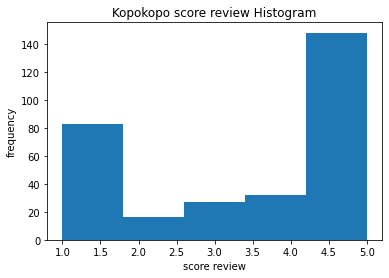

In [114]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Kopo_koposort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Kopokopo score review Histogram")
plt.show()

# Pesapal

In [115]:
PesaPalsort_data_sum_missing = PesaPalsort_data.isnull().sum()
print(PesaPalsort_data_sum_missing)

content                 0
reviewCreatedVersion    4
score                   0
at                      0
thumbsUpCount           0
dtype: int64


In [116]:
highest_score = PesaPalsort_data[PesaPalsort_data["score"]==5]
print("Pesapal highest scores:", highest_score.head())

Pesapal highest scores:                                               content reviewCreatedVersion  \
19                           Uduma nzuri inarahisisha                 None   
2   The app is nice but anytime I try selling on c...                   29   
4            best app need charts summary thanks alot                   29   
1   It's the best love it, saves time and it's acc...                   29   
11                                            Awesome                   20   

    score                  at  thumbsUpCount  
19      5 2021-12-28 10:23:57              0  
2       5 2019-12-09 18:59:03              3  
4       5 2019-01-13 19:23:58              3  
1       5 2018-11-21 09:48:20              7  
11      5 2018-08-18 04:49:06              1  


In [117]:
medium_score = PesaPalsort_data[PesaPalsort_data["score"] == 3]
print("Pesapal medium score:", medium_score.head()) 

Pesapal medium score:                                              content reviewCreatedVersion  \
0  One of the best POs app, one improvement neede...                 35.4   
5  how do I appdate after selling an item?? pleas...                 None   

   score                  at  thumbsUpCount  
0      3 2022-06-22 06:50:54              0  
5      3 2019-03-21 11:08:51              3  


In [118]:
print(PesaPalsort_data.reviewCreatedVersion.nunique())
print(PesaPalsort_data.reviewCreatedVersion.unique())
print(PesaPalsort_data.reviewCreatedVersion.value_counts())

7
['35.4' None '29' '32' '20' '16' '14' '11']
20      5
29      4
16      3
14      2
35.4    1
32      1
11      1
Name: reviewCreatedVersion, dtype: int64


In [119]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (PesaPalsort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
11      5.000000
14      5.000000
16      2.333333
20      4.800000
29      4.750000
32      4.000000
35.4    3.000000
Name: score, dtype: float64


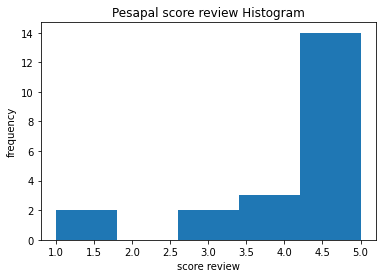

In [120]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(PesaPalsort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Pesapal score review Histogram")
plt.show()

## **Paystack **

In [121]:
Paystacksort_data_sum_missing = Paystacksort_data.isnull().sum()
print(Paystacksort_data_sum_missing)

content                  0
reviewCreatedVersion    58
score                    0
at                       0
thumbsUpCount            0
dtype: int64


In [122]:
highest_score = Paystacksort_data[Paystacksort_data["score"]==5]
print("Paystack highest scores:", highest_score.head())

Paystack highest scores:                                                content reviewCreatedVersion  \
125                                   Word conect game                1.9.4   
231                                      Nice and good                1.9.3   
233                                               Good                1.8.3   
268                                               Good                 None   
117  Just a click we all will see the importance no...                 None   

     score                  at  thumbsUpCount  
125      5 2022-12-08 07:46:36              0  
231      5 2022-11-21 23:22:07              1  
233      5 2022-10-23 09:41:12              0  
268      5 2022-10-20 14:04:46              0  
117      5 2022-10-16 15:39:11              0  


In [123]:
medium_score = Paystacksort_data[Paystacksort_data["score"] == 3]
print("Paystack medium score:", medium_score.head()) 

Paystack medium score:                                                content reviewCreatedVersion  \
27          I give it 3 🌟 because it not working today                1.9.4   
56   Why can't I login in to my acct pls help me re...                1.9.3   
267                                               Best                 None   
221          How can I withdraw from my Pay Stack app.                1.8.3   
70   Good evening paystack, I just got a debit aler...                1.8.1   

     score                  at  thumbsUpCount  
27       3 2022-12-01 00:54:55              1  
56       3 2022-11-23 13:12:26              1  
267      3 2022-09-03 07:14:21              0  
221      3 2022-08-24 23:24:38              0  
70       3 2022-01-21 15:56:28              4  


In [124]:
print(Paystacksort_data.reviewCreatedVersion.nunique())
print(Paystacksort_data.reviewCreatedVersion.unique())
print(Paystacksort_data.reviewCreatedVersion.value_counts())

31
['1.9.4' '1.9.3' None '1.8.3' '1.8.1' '1.8.2' '1.7.2' '1.8.0' '1.3.9'
 '1.6.0' '1.5.3' '1.2.6' '1.3.8' '1.1.9' '1.3.7' '1.3.6' '1.3.1' '1.3.5'
 '1.3.3' '1.3.0' '1.2.5' '1.2.4' '1.2.2' '1.2.0' '1.1.6' '1.1.7' '1.0.4'
 '1.0' '1.1.4' '1.1.3' '1.1.1' '1.0.2']
1.1.7    29
1.8.3    25
1.3.9    23
1.3.1    15
1.1.4    11
1.8.1    10
1.7.2    10
1.2.6     9
1.3.3     8
1.2.4     7
1.9.3     7
1.3.8     6
1.1.9     6
1.3.0     6
1.0.4     5
1.5.3     5
1.0       5
1.3.6     5
1.1.6     5
1.2.2     5
1.9.4     3
1.6.0     3
1.2.5     2
1.8.0     2
1.1.3     2
1.2.0     1
1.3.5     1
1.3.7     1
1.8.2     1
1.1.1     1
1.0.2     1
Name: reviewCreatedVersion, dtype: int64


In [125]:
# Find out average of all ratings for each unique version and check which version received highest average rating.
x = (Paystacksort_data.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
1.0      2.200000
1.0.2    5.000000
1.0.4    2.800000
1.1.1    5.000000
1.1.3    5.000000
1.1.4    4.363636
1.1.6    3.600000
1.1.7    3.482759
1.1.9    3.833333
1.2.0    3.000000
1.2.2    2.400000
1.2.4    3.142857
1.2.5    3.000000
1.2.6    2.888889
1.3.0    1.166667
1.3.1    3.666667
1.3.3    1.000000
1.3.5    3.000000
1.3.6    1.000000
1.3.7    3.000000
1.3.8    1.500000
1.3.9    1.956522
1.5.3    1.600000
1.6.0    3.666667
1.7.2    2.200000
1.8.0    3.500000
1.8.1    2.100000
1.8.2    1.000000
1.8.3    1.880000
1.9.3    1.857143
1.9.4    3.333333
Name: score, dtype: float64


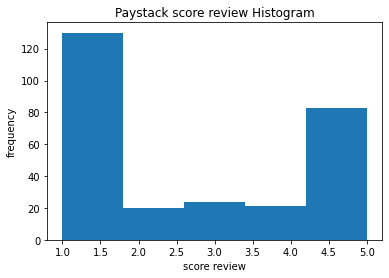

In [126]:
# Visualize data using histogram to determine if app is more positive reviews or negative reviews in terms of score
plt.hist(Paystacksort_data['score'], bins = 5)
plt.xlabel("score review")
plt.ylabel("frequency")
plt.title("Paystack score review Histogram")
plt.show()

From the above graph showing the frequency of each rating received, it can be said that most of the times app received either 4 or 5 rating. Thus, it can also be said that the app performs above average.

### **Data Pre-processing**

1. Kopokopo
2. Pesapal
3. Paystack

***Lowercasing***
This is to maintain consistency of data


In [127]:
# check data type of content and change to str
type(Kopo_koposort_data["content"])

pandas.core.series.Series

In [128]:
#convert to str
Kopo_koposort_data['content'] = Kopo_koposort_data['content'].astype(str)
print(Kopo_koposort_data['content'].head())

30     I like how you communicate and also your loan ...
170                                        Good services
104                                       So far so good
169                                         Good service
65                                     best for business
Name: content, dtype: object


we note that some of the words are in caps hence leading to inconsistency

In [129]:
#Lowercase all reviews
Kopo_koposort_data['content'] = Kopo_koposort_data['content'].apply(lambda x: x.lower())
print(Kopo_koposort_data['content'].head()) # to see the difference

30     i like how you communicate and also your loan ...
170                                        good services
104                                       so far so good
169                                         good service
65                                     best for business
Name: content, dtype: object


## **Emojis**

1. Kopokopo
2. Pesapal
3. Paystack

It is also important to remove emojis from data as it can sometimes create a problem with analysis further.

In [130]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Kopo_koposort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Kopo_koposort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis)    


True
['i like how you communicate and also your loan services. fatastic', 'good services', 'so far so good', 'good service', 'best for business', 'great app, withdrawals never take more than 5min, professional customer care service.so far so good 4yrs with them.', 'awesome app..jah guide', 'most beneficial app in business..', 'quite useful.', 'it is a nice till i recommend other investors to use the app', "very useless app, how can i be transacting my cash through your app,then you deny me advance because my business has gone down for one week,i mean, does one week determine the rest of other three months!! i think the advance option is put there to entice the users, guys don't try this app", 'very useless', "its a very fast approaching app it's much easier and faster", "very slow app very very disappointing app i can't recommend this to any business it's so slow it takes 20 minutes to upload a transaction especially clients payment.", 'good.', 'convient lender but very high interest p

## **Stopwords**

Removing stopwords can improve the performance to a great extent. Words such as myself, me , she, he , they , mine, you etc. When these words are removed only meaningful tokens are left.

1. Kopokopo
2. Pesapal
3. Paystack

In [131]:
# stop words
stop_words = stopwords.words('english')
Kopo_koposort_data["extracted_emojis"] = extracted_emojis
Kopo_koposort_data["extracted_emojis"] = Kopo_koposort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Kopo_koposort_data['extracted_emojis'].head())

30     i like how you communicate and also your loan ...
170                                        good services
104                                       so far so good
169                                         good service
65                                     best for business
Name: extracted_emojis, dtype: object


## **Stemming**

Stemming is also an important process, it chops off the end of the word and transform the word into its root form. All suffixes like -s, -es, -ed, -ing are removed.

1. Kopokopo
2. Pesapal
3. Paystack

In [132]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


Kopo_koposort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Kopo_koposort_data['extracted_emojis'].head())      

30     i like how you communicate and also your loan ...
170                                        good services
104                                       so far so good
169                                         good service
65                                     best for business
Name: extracted_emojis, dtype: object


## **Sentiment Score**

Each review will receive sentiment score

1. Kopokopo
2. Pesapal
3. Paystack

In [133]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Kopo_koposort_data["Sentiment_score"]= Kopo_koposort_data["extracted_emojis"].apply(senti_sc)
print(Kopo_koposort_data.loc[0:19,['extracted_emojis','Sentiment_score']])


                                      extracted_emojis  \
0    ultimate solution for business payments. you c...   
167                                           the best   
9    it is business friendly, convenient and easy t...   
11   very high interest rates, not good for a small...   
114                                 nice but expensive   
172                                            perfect   
298                                              trash   
12   fantastic app but your interest rates on the g...   
171                                            awesome   
26   it's a good app for tracking your payments, ea...   
41   thanks alot to kopokopo company at large for y...   
73                useless,can't even create an account   
6    nice but high interest rate.if these rates wou...   
163                                   very convenient    
37   the app is okay bt some get advance within fir...   
13   best of all lending apps,enough money with fri...   
70   ncy busin

In [134]:
#for i in 
Kopo_koposort_data['Sentiment_score'][0]

Sentiment(polarity=0.2958333333333333, subjectivity=0.6291666666666667)

In [135]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Kopo_koposort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 


In [136]:
Kopo_koposort_data['polarity'] = polarity
Kopo_koposort_data['subjectivity'] = subjectivity

In [137]:
conditions = [(Kopo_koposort_data['polarity'] < 0),(Kopo_koposort_data['polarity'] == 0),(Kopo_koposort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Kopo_koposort_data['feedback'] = np.select(conditions,values)

In [138]:
Kopo_koposort_data[Kopo_koposort_data.polarity>0].head(10)

,content,reviewCreatedVersion,score,at,thumbsUpCount,extracted_emojis,Sentiment_score,polarity,subjectivity,feedback
170,good services,5.3.0,5,2022-12-16 16:45:40,0,good services,"(0.7, 0.6000000000000001)",0.700000,0.600000,positive feedback
104,so far so good,5.3.0,5,2022-12-16 06:24:05,0,so far so good,"(0.39999999999999997, 0.8)",0.400000,0.800000,positive feedback
169,good service,5.3.0,5,2022-12-14 01:52:08,0,good service,"(0.7, 0.6000000000000001)",0.700000,0.600000,positive feedback
65,best for business,5.3.0,4,2022-12-13 12:17:31,0,best for business,"(1.0, 0.3)",1.000000,0.300000,positive feedback
5,"great app, withdrawals never take more than 5m...",5.3.0,5,2022-12-09 18:07:27,0,"great app, withdrawals never take more than 5m...","(0.44000000000000006, 0.5900000000000001)",0.440000,0.590000,positive feedback
64,awesome app..jah guide,5.3.0,5,2022-12-08 07:10:18,0,awesome app..jah guide,"(1.0, 1.0)",1.000000,1.000000,positive feedback
63,most beneficial app in business..,5.3.0,5,2022-12-04 21:25:52,0,most beneficial app in business..,"(0.5, 0.5)",0.500000,0.500000,positive feedback
164,quite useful.,5.3.0,4,2022-12-04 15:23:28,0,quite useful.,"(0.3, 0.0)",0.300000,0.000000,positive feedback
40,it is a nice till i recommend other investors ...,5.3.0,5,2022-12-04 11:47:53,0,it is a nice till i recommend other investors ...,"(0.2375, 0.6875)",0.237500,0.687500,positive feedback
10,its a very fast approaching app it's much easi...,5.3.0,5,2022-11-07 21:32:27,1,its a very fast approaching app it's much easi...,"(0.15333333333333335, 0.32666666666666666)",0.153333,0.326667,positive feedback


positive feedback    0.624183
neutral feedback     0.248366
negative feedback    0.127451
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Kopo Kopo feedback rate')

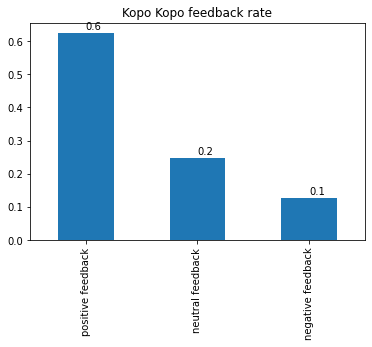

In [139]:
print(Kopo_koposort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Kopo_koposort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Kopo Kopo feedback rate')

positive feedback    191
neutral feedback      76
negative feedback     39
Name: feedback, dtype: int64


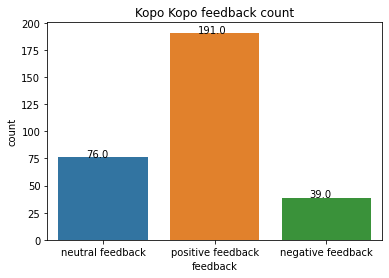

In [140]:
print(Kopo_koposort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Kopo_koposort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Kopo Kopo feedback count');

# PESAPAL

In [141]:
#convert to str
PesaPalsort_data['content'] = PesaPalsort_data['content'].astype(str)
print(PesaPalsort_data['content'].head())

0     One of the best POs app, one improvement neede...
19                             Uduma nzuri inarahisisha
6     Pesapal ina saìdia wakati wowote ile unapoiita...
3     Its a good app I wish it were available on des...
2     The app is nice but anytime I try selling on c...
Name: content, dtype: object


In [142]:
#Lowercase all reviews
PesaPalsort_data['content'] = PesaPalsort_data['content'].apply(lambda x: x.lower())
print(PesaPalsort_data['content'].head()) # to see the difference

0     one of the best pos app, one improvement neede...
19                             uduma nzuri inarahisisha
6     pesapal ina saìdia wakati wowote ile unapoiita...
3     its a good app i wish it were available on des...
2     the app is nice but anytime i try selling on c...
Name: content, dtype: object


In [143]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(PesaPalsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in PesaPalsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis) 

True
["one of the best pos app, one improvement needed especially when expenditure is made to effect on daily income. and even the statement should show even transactions under services even because it's part of money received and generate the balance. even sales at credit note sms should even show organisation name. thanks", 'uduma nzuri inarahisisha', 'pesapal ina saìdia wakati wowote ile unapoiitaji pia ni rahisi sana kukusaidia', 'its a good app i wish it were available on desktop or laptop', 'the app is nice but anytime i try selling on credit the app stops immediately. help out please.', 'how do i appdate after selling an item?? please help!', 'best app need charts summary thanks alot', "it's the best love it, saves time and it's accurate as long us you feed in the correct data", 'awesome', "this app is doing me wonders in managing my business. but am sure thy ar \nadding more features. can't wait for the next update", 'the director of this program is darafu very good boy', 'can 

In [144]:
# stop words
stop_words = stopwords.words('english')
PesaPalsort_data["extracted_emojis"] = extracted_emojis
PesaPalsort_data["extracted_emojis"] = PesaPalsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(PesaPalsort_data['extracted_emojis'].head())

0     one of the best pos app, one improvement neede...
19                             uduma nzuri inarahisisha
6     pesapal ina saìdia wakati wowote ile unapoiita...
3     its a good app i wish it were available on des...
2     the app is nice but anytime i try selling on c...
Name: extracted_emojis, dtype: object


In [145]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


PesaPalsort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(PesaPalsort_data['extracted_emojis'].head())   

0     one of the best pos app, one improvement neede...
19                             uduma nzuri inarahisisha
6     pesapal ina saìdia wakati wowote ile unapoiita...
3     its a good app i wish it were available on des...
2     the app is nice but anytime i try selling on c...
Name: extracted_emojis, dtype: object


In [146]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

PesaPalsort_data["Sentiment_score"]= PesaPalsort_data["extracted_emojis"].apply(senti_sc)
print(PesaPalsort_data.loc[0:19,['extracted_emojis','Sentiment_score']])

                                     extracted_emojis Sentiment_score
0   one of the best pos app, one improvement neede...    (0.3, 0.375)
19                           uduma nzuri inarahisisha      (0.0, 0.0)


In [147]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in PesaPalsort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [148]:
PesaPalsort_data['polarity'] = polarity
PesaPalsort_data['subjectivity'] = subjectivity

In [149]:
conditions = [(PesaPalsort_data['polarity'] < 0),(PesaPalsort_data['polarity'] == 0),(PesaPalsort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
PesaPalsort_data['feedback'] = np.select(conditions,values)

positive feedback    0.571429
neutral feedback     0.428571
Name: feedback, dtype: float64


Text(0.5, 1.0, 'PesaPal feedback rate')

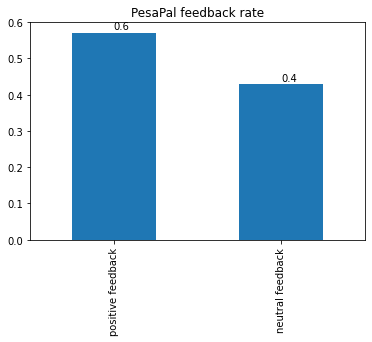

In [150]:
print(PesaPalsort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  PesaPalsort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('PesaPal feedback rate')

positive feedback    12
neutral feedback      9
Name: feedback, dtype: int64


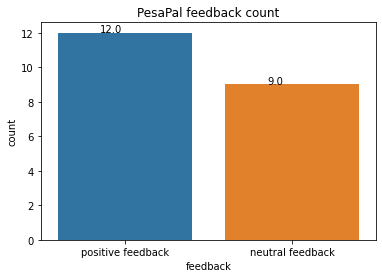

In [151]:
print(PesaPalsort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = PesaPalsort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('PesaPal feedback count');

## **PAYSTACK**

In [152]:
#convert to str
Paystacksort_data['content'] = Paystacksort_data['content'].astype(str)
print(Paystacksort_data['content'].head())

26     Kenya is missing on registration. I thought yo...
125                                     Word conect game
27            I give it 3 🌟 because it not working today
56     Why can't I login in to my acct pls help me re...
231                                        Nice and good
Name: content, dtype: object


In [153]:
#Lowercase all reviews
Paystacksort_data['content'] = Paystacksort_data['content'].apply(lambda x: x.lower())
print(Paystacksort_data['content'].head()) # to see the difference

26     kenya is missing on registration. i thought yo...
125                                     word conect game
27            i give it 3 🌟 because it not working today
56     why can't i login in to my acct pls help me re...
231                                        nice and good
Name: content, dtype: object


In [154]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Paystacksort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Paystacksort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis) 

True
['kenya is missing on registration. i thought you had already launched it.', 'word conect game', 'i give it 3  because it not working today', "why can't i login in to my acct pls help me reset it", 'nice and good', "after creating an account in the app i could not even login. i uninstall the app and install it again and i try to login but it's not working. i'm rating the app on star until i can login. the app is very very poor and i c", 'the updated version is not signing in, when i click sign in the app just restarts', 'i am yet to receive my payout for more 7 days now from paystack. all attempt trying to contact support via email prove to be abortive', "there is a bug in this current update... i can't sign in, rather it takes me back to the creat account page...", 'i cannot log into my account using this app, help!', "please this updated version is really giving me issues, its asking me to create account. when i create account by filling my details and clicking on accepting term

In [155]:
# stop words
stop_words = stopwords.words('english')
Paystacksort_data["extracted_emojis"] = extracted_emojis
Paystacksort_data["extracted_emojis"] = Paystacksort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Paystacksort_data['extracted_emojis'].head())

26     kenya is missing on registration. i thought yo...
125                                     word conect game
27             i give it 3  because it not working today
56     why can't i login in to my acct pls help me re...
231                                        nice and good
Name: extracted_emojis, dtype: object


In [156]:
from nltk.stem.snowball import PorterStemmer
#stemming
def stemming(x):
  st = PorterStemmer()
  if x is not None:
    for word in x.split():
      st.stem(word)


Paystacksort_data['extracted_emojis'].apply(lambda x: stemming(x))
print(Paystacksort_data['extracted_emojis'].head())   

26     kenya is missing on registration. i thought yo...
125                                     word conect game
27             i give it 3  because it not working today
56     why can't i login in to my acct pls help me re...
231                                        nice and good
Name: extracted_emojis, dtype: object


In [157]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

Paystacksort_data["Sentiment_score"]= Paystacksort_data["extracted_emojis"].apply(senti_sc)
print(Paystacksort_data.loc[0:19,['extracted_emojis','Sentiment_score']])

                                      extracted_emojis  \
0    please this updated version is really giving m...   
59   it's good just the biometric login is not work...   
18   the refund button is not working. what is wron...   
116  paystach pls what is wrong today? i have a gam...   
233                                               good   
19   very useless app , app is supposed to have its...   

                               Sentiment_score  
0                             (-0.05, 0.30625)  
59                   (0.7, 0.6000000000000001)  
18    (0.2333333333333333, 0.7000000000000001)  
116                              (-0.55, 0.72)  
233                  (0.7, 0.6000000000000001)  
19   (-0.0666666666666667, 0.4033333333333333)  


In [158]:
from textblob.en import subjectivity
polarity=[]
subjectivity = []
for i in Paystacksort_data['extracted_emojis'].values:
  try:
    analysis = TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
    
  except:
     polarity.append(0)
     subjectivity.append(0) 

In [159]:
Paystacksort_data['polarity'] = polarity
Paystacksort_data['subjectivity'] = subjectivity

In [160]:
conditions = [(Paystacksort_data['polarity'] < 0),(Paystacksort_data['polarity'] == 0),(Paystacksort_data['polarity'] > 0)]
values = ['negative feedback', 'neutral feedback', 'positive feedback']
Paystacksort_data['feedback'] = np.select(conditions,values)

positive feedback    0.510791
neutral feedback     0.287770
negative feedback    0.201439
Name: feedback, dtype: float64


Text(0.5, 1.0, 'Paystack feedback rate')

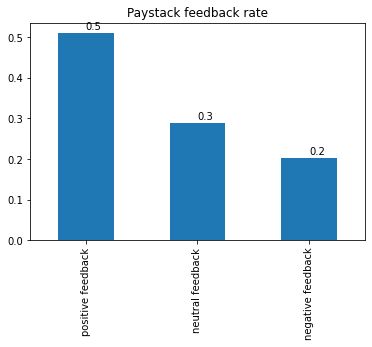

In [161]:
print(Paystacksort_data['feedback'].value_counts(normalize=True))
Feedback_rate =  Paystacksort_data['feedback'].value_counts(normalize=True).plot(kind="bar")
for i in Feedback_rate.patches:
  Feedback_rate.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Paystack feedback rate')

positive feedback    142
neutral feedback      80
negative feedback     56
Name: feedback, dtype: int64


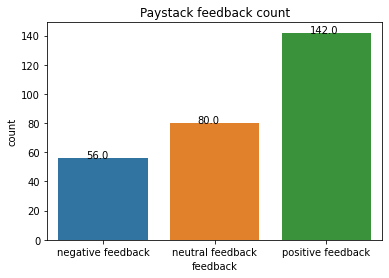

In [162]:
print(Paystacksort_data['feedback'].value_counts())
Feedback_value = sns.countplot(x='feedback', data = Paystacksort_data)
for i in Feedback_value.patches:
  Feedback_value.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title('Paystack feedback count');

Overall feedback rate

From the above results sentiment polarity and subjectivity has been calculated. Sentiment polarity is denoting if the review is positive or negative and subjectivity is denoting the subjectivity of the text.

Further, this analysis can be used in various other applications where the aspects of the product or the application that are more positively accepted in market can be explored for more business opportunities.

In [163]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mi

In [164]:
!jupyter nbconvert --to pdf /content/Google_play_store Analysis.ipynb

[NbConvertApp] WARNING | pattern '/content/Google_play_store' matched no files
[NbConvertApp] WARNING | pattern 'Analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead o